# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
sys.path.append('..')  # Add parent directory to the system path
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

In [3]:
cities

['santander jimenez',
 'keflavik',
 'port-aux-francais',
 'carnarvon',
 'port elizabeth',
 'merowe',
 'waitangi',
 "'ohonua",
 'pont rouge',
 'blackmans bay',
 'deniliquin',
 'edinburgh of the seven seas',
 'taiohae',
 'yemetsk',
 'iskateley',
 'palmer',
 'daru',
 'fuvahmulah',
 'puerto san carlos',
 'reggane',
 "nar'yan-mar",
 'ilulissat',
 'carrigaline',
 'salalah',
 'puerto deseado',
 'tazovsky',
 'adamstown',
 'punta arenas',
 'nova sintra',
 'launceston',
 'camalu',
 'road town',
 'meizhou',
 'megion',
 'enewetak',
 'amursk',
 'labytnangi',
 'lazaro cardenas',
 'saipan',
 'hithadhoo',
 'invercargill',
 'buka',
 'udachny',
 'puerto natales',
 'monrovia',
 'yellowknife',
 'rio grande',
 'howard springs',
 'tindouf',
 'port douglas',
 'yantarnyy',
 'grytviken',
 "hayma'",
 'mahdia',
 'sheboygan',
 'papatowai',
 'bethel',
 'puerto penasco',
 'ponta delgada',
 'thompson',
 'xiongzhou',
 'dudinka',
 'porbandar',
 'tranovaho',
 'boende',
 'fallon',
 'qaqortoq',
 'hammerfest',
 'ola',
 'b

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santander jimenez
Processing Record 2 of Set 1 | keflavik
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | merowe
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | pont rouge
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | deniliquin
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | yemetsk
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | palmer
Processing Record 17 of Set 1 | daru
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | puerto san carlos
City not found. Skipping...
Proc

Processing Record 37 of Set 4 | florida
Processing Record 38 of Set 4 | st. john's
Processing Record 39 of Set 4 | nyzhni sirohozy
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | dragasani
Processing Record 42 of Set 4 | cole harbour
Processing Record 43 of Set 4 | port glaud
City not found. Skipping...
Processing Record 44 of Set 4 | gadzhiyevo
Processing Record 45 of Set 4 | ust-nera
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | belmonte
Processing Record 48 of Set 4 | makarov
Processing Record 49 of Set 4 | kabare
Processing Record 0 of Set 5 | macusani
Processing Record 1 of Set 5 | rikaze
Processing Record 2 of Set 5 | hoxtolgay
City not found. Skipping...
Processing Record 3 of Set 5 | marengo
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | tofol
Processing Record 6 of Set 5 | vilyuchinsk
Processing Record 7 of Set 5 | assis
Processing Record 8 of Set 5 | trenggalek
Processing Record 9 of Set 5 | kiraws

Processing Record 33 of Set 8 | rosetta
Processing Record 34 of Set 8 | talavera
Processing Record 35 of Set 8 | colonia
Processing Record 36 of Set 8 | kashgar
Processing Record 37 of Set 8 | zhalantun
Processing Record 38 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 39 of Set 8 | massenya
Processing Record 40 of Set 8 | east honolulu
City not found. Skipping...
Processing Record 41 of Set 8 | langzhong
Processing Record 42 of Set 8 | fort-shevchenko
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | majie
Processing Record 45 of Set 8 | tughyl
Processing Record 46 of Set 8 | choibalsan
Processing Record 47 of Set 8 | yanam
Processing Record 48 of Set 8 | sawakin
Processing Record 49 of Set 8 | zonguldak
Processing Record 0 of Set 9 | sao jose do rio pardo
Processing Record 1 of Set 9 | i-n-salah
Processing Record 2 of Set 9 | piranhas
Processing Record 3 of Set 9 | qarah bagh
Processing Record 4 of Set 9 | coahuayana de hidal

Processing Record 22 of Set 12 | antsiranana
Processing Record 23 of Set 12 | teknaf
Processing Record 24 of Set 12 | kingston
Processing Record 25 of Set 12 | muravlenko
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
from pprint import pprint
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 63.7898, 'lon': 74.523},
 'dt': 1681960795,
 'id': 1540711,
 'main': {'feels_like': -10.66,
          'grnd_level': 1004,
          'humidity': 94,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': -5.87,
          'temp_max': -5.87,
          'temp_min': -5.87},
 'name': 'Muravlenko',
 'sys': {'country': 'RU', 'sunrise': 1681946166, 'sunset': 1682001923},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 295, 'gust': 4.26, 'speed': 3.1}}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santander jimenez,24.2167,-98.4667,24.42,83,97,5.82,MX,1681960135
1,keflavik,64.0049,-22.5624,7.24,100,75,8.75,IS,1681960136
2,port-aux-francais,-49.3500,70.2167,4.98,68,12,15.55,TF,1681960138
3,carnarvon,-24.8667,113.6333,27.39,36,32,6.53,AU,1681960139
4,port elizabeth,-33.9180,25.5701,18.51,91,40,2.57,ZA,1681960128


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santander jimenez,24.2167,-98.4667,24.42,83,97,5.82,MX,1681960135
1,keflavik,64.0049,-22.5624,7.24,100,75,8.75,IS,1681960136
2,port-aux-francais,-49.3500,70.2167,4.98,68,12,15.55,TF,1681960138
3,carnarvon,-24.8667,113.6333,27.39,36,32,6.53,AU,1681960139
4,port elizabeth,-33.9180,25.5701,18.51,91,40,2.57,ZA,1681960128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

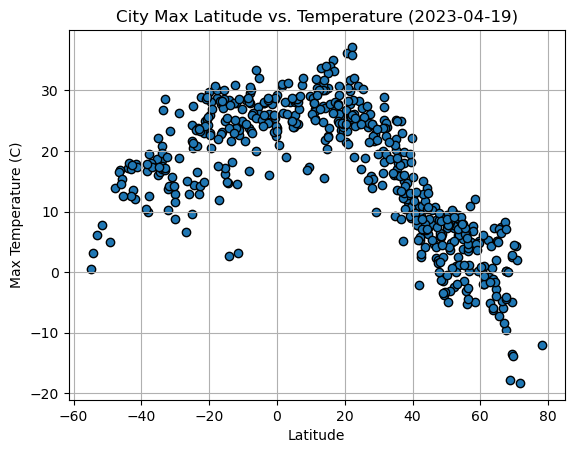

In [25]:
# Build scatter plot for latitude vs. temperature
from datetime import date

today = date.today()
#convert the date to a string format using the strftime()
date_str = today.strftime("%Y-%m-%d")
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Max Temp'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

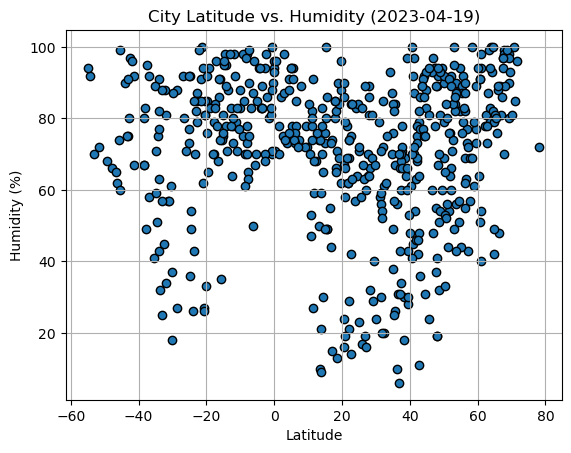

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Humidity'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

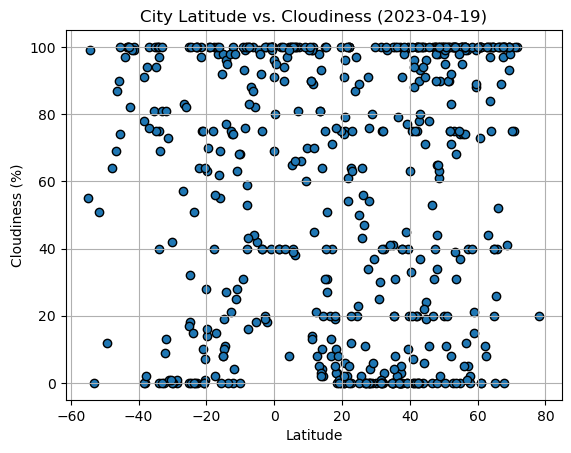

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Cloudiness'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

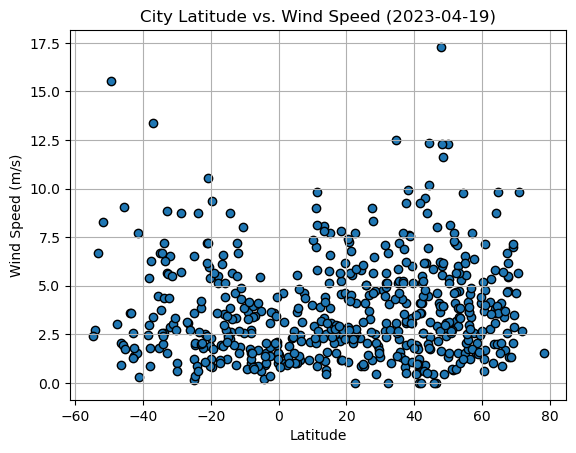

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = [city['Lat'] for city in city_data]
y_values = [city['Wind Speed'] for city in city_data]

plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date_str})')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Calculate the slope, intercept, r-value, p-value, and standard error of the regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line using the slope and intercept
    regress_values = slope * x_values + intercept

    # Create a scatter plot of x and y values
    plt.scatter(x_values, y_values)

    # Plot the regression line on the same plot
    plt.plot(x_values, regress_values, "r")

    # Add title, x-axis label, y-axis label, and text label for the equation of the line
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=15, color="red")
    
    # Print the r-squared value
    print(f"The r-squared value is: {round(rvalue**2, 2)}")
   
    
    # Show the plot
    plt.show()


# x_values = np.array(x_values)


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santander jimenez,24.2167,-98.4667,24.42,83,97,5.82,MX,1681960135
1,keflavik,64.0049,-22.5624,7.24,100,75,8.75,IS,1681960136
5,merowe,18.4833,31.8167,25.72,13,0,4.59,SD,1681960142
7,pont rouge,48.8833,-72.0825,-1.44,81,90,2.87,CA,1681960150
11,yemetsk,63.4721,41.7941,0.69,99,100,2.00,RU,1681960154


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.98,68,12,15.55,TF,1681960138
3,carnarvon,-24.8667,113.6333,27.39,36,32,6.53,AU,1681960139
4,port elizabeth,-33.9180,25.5701,18.51,91,40,2.57,ZA,1681960128
6,waitangi,-43.9535,-176.5597,17.12,90,97,3.58,NZ,1681960126
8,blackmans bay,-43.0167,147.3167,17.07,75,100,2.57,AU,1681960151


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.8


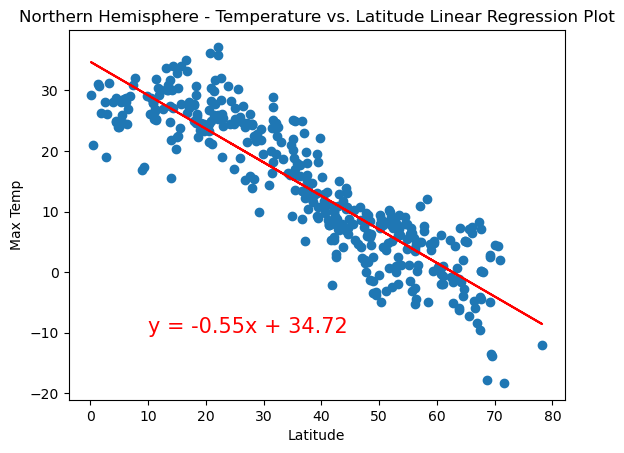

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Max Temp'], 
                       'Northern Hemisphere - Temperature vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Max Temp', 
                       (10,-10))

The r-squared value is: 0.41


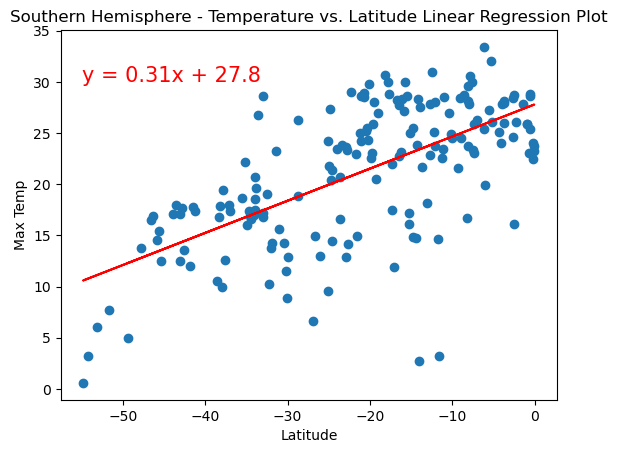

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Max Temp'], 
                       'Southern Hemisphere - Temperature vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Max Temp', 
                       (-55,30))

**Discussion about the linear relationship:** These regression equations suggest that there is a strong linear relationship between maximum temperature and latitude in both the Northern Hemisphere and Southern Hemisphere.

For the Northern Hemisphere, the regression equation y=-0.55x+34.72 indicates that, on average, maximum temperature decreases by 0.55 degrees Celsius for every one-degree increase in latitude as we move further away from the equator towards the North Pole. The relatively high intercept of 34.72 suggests that even at the lowest latitudes in the Northern Hemisphere, the average maximum temperature is likely to be around 35 degrees Celsius.

For the Southern Hemisphere, the regression equation y=0.31x+27.8 indicates that, on average, maximum temperature increases by 0.31 degrees Celsius for every one-degree increase in latitude as we move closer to the equator from the South Pole. The relatively low intercept of 27.8 suggests that even at the highest latitudes in the Southern Hemisphere, the average maximum temperature is likely to be around 28 degrees Celsius.

These regression equations suggest that latitude is a strong predictor of maximum temperature in both hemispheres, with temperatures decreasing as we move further away from the equator towards the poles in the Northern Hemisphere and increasing as we move closer to the equator from the South Pole in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.03


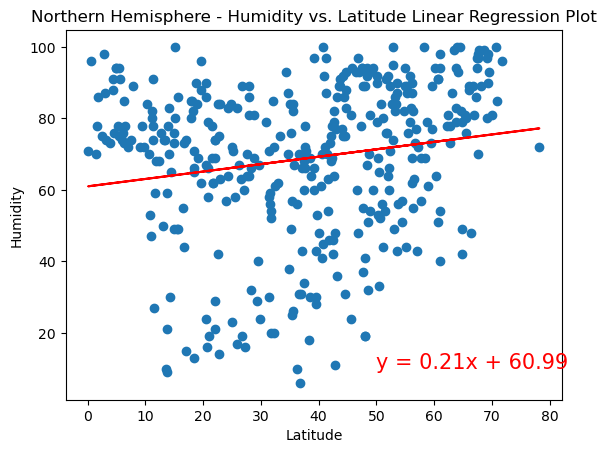

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Humidity'], 
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Humidity', 
                       (50,10))

The r-squared value is: 0.05


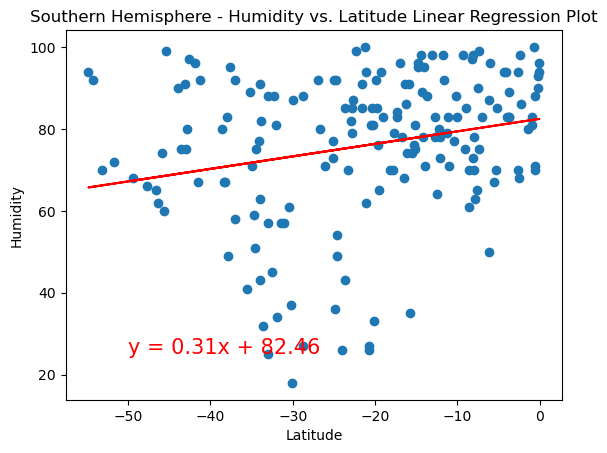

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Humidity'], 
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Humidity', 
                       (-50,25))

**Discussion about the linear relationship:** These equations can be used to model the relationship between latitude (x) and humidity (y) in the Northern and Southern Hemispheres, respectively. The slope of each equation represents the change in humidity per unit change in latitude, and the intercept represents the humidity level at the equator (latitude = 0).

Based on these equations, we can make some observations about the relationship between latitude and humidity in each hemisphere:

Northern Hemisphere: The slope of the regression line is positive (0.21), which indicates that humidity tends to increase as we move northward from the equator. The intercept (60.99) suggests that the humidity level at the equator is around 61%, although it's important to note that this value is not based on actual data and may not be accurate.

Southern Hemisphere: The slope of the regression line is also positive (0.31), which indicates that humidity tends to increase as we move southward from the equator. The intercept (82.46) suggests that the humidity level at the equator is around 82%, although this value should also be interpreted with caution.

Overall, these regression equations suggest that there is a weak positive correlation between latitude and humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.03


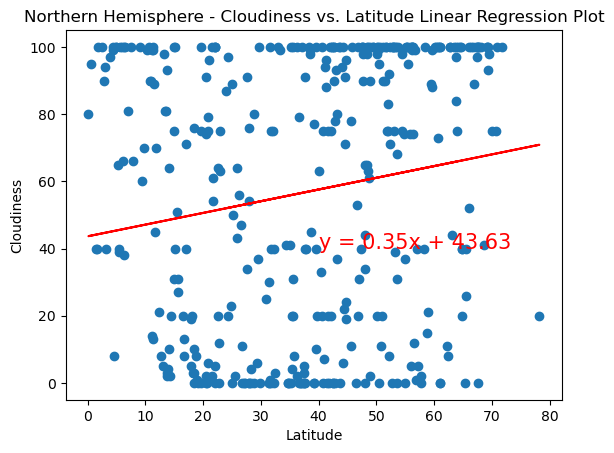

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Cloudiness'], 
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Cloudiness', 
                       (40,40))

The r-squared value is: 0.0


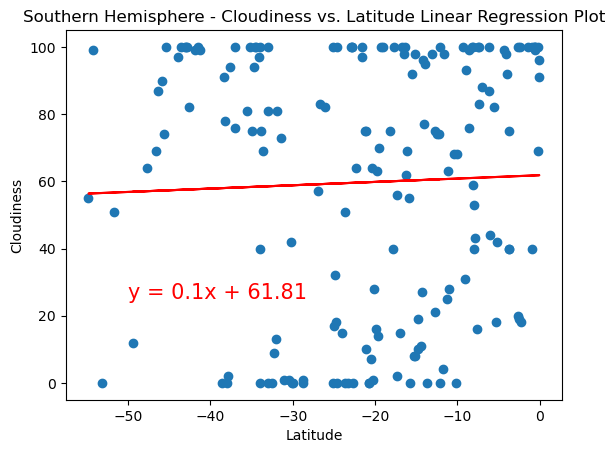

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Cloudiness'], 
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Cloudiness', 
                       (-50,25))

**Discussion about the linear relationship:** These equations represent the regression lines for the relationship between cloudiness and latitude in the Northern Hemisphere and Southern Hemisphere, respectively. 

For the Northern Hemisphere, the equation is y = 0.35x + 43.63. This means that, on average, cloudiness increases by 0.35% for every degree of latitude as we move north from the equator. The y-intercept of 43.63 indicates that when latitude is 0 (at the equator), the average cloudiness is about 44%. The slope of the regression line is positive, indicating that there is a weak positive correlation between cloudiness and latitude in the Northern Hemisphere.

For the Southern Hemisphere, the equation is y = 0.1x + 61.81. This means that, on average, cloudiness increases by 0.1% for every degree of latitude as we move south from the equator. The y-intercept of 61.81 indicates that when latitude is 0 (at the equator), the average cloudiness is about 62%. The slope of the regression line is also positive, indicating that there is a weak positive correlation between cloudiness and latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.01


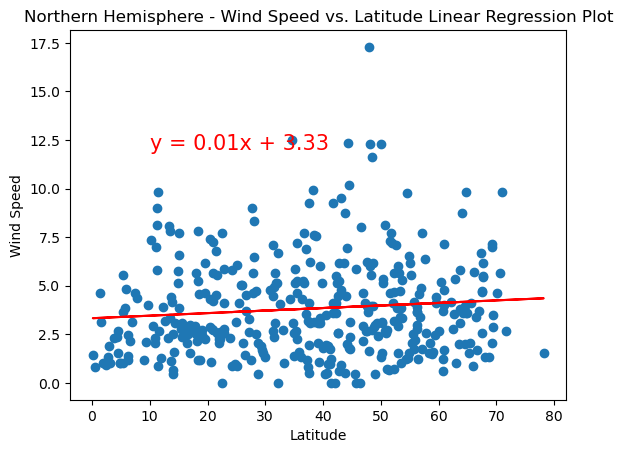

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Wind Speed'], 
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Wind Speed', 
                       (10,12))

The r-squared value is: 0.06


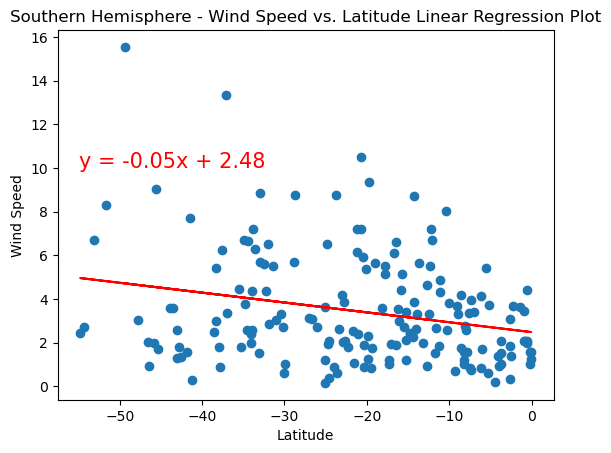

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Wind Speed'], 
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot', 
                       'Latitude', 
                       'Wind Speed', 
                       (-55,10))

**Discussion about the linear relationship:** These regression equations suggest that there is a weak or no linear relationship between wind speed and latitude in both the Northern Hemisphere and Southern Hemisphere.

For the Northern Hemisphere, the regression equation y=0.01x+3.33 indicates that, on average, wind speed increases by 0.01 meters per second for every one-degree increase in latitude as we move closer to the North Pole. The low slope and the relatively low intercept of 3.33 suggest that the relationship between latitude and wind speed in the Northern Hemisphere is weak, and that latitude may not be a strong predictor of wind speed.

For the Southern Hemisphere, the regression equation y=-0.05x+2.48 indicates that, on average, wind speed decreases by 0.05 meters per second for every one-degree increase in latitude as we move closer to the equator from the South Pole. The negative slope of the regression line suggests that wind speed tends to decrease as we move closer to the equator in the Southern Hemisphere. However, the low slope and the relatively low intercept of 2.48 suggest that the relationship between latitude and wind speed in the Southern Hemisphere is also weak.

**Limitations:** It's important to note that while these plots provide some insights into the relationships between these variables and latitude, they do not account for other factors that may affect these variables, such as local geography, climate patterns, and human activity. 